# Методы машинного обучения 

In [366]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import kmeans_plusplus
from sklearn.decomposition import PCA
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster.kmeans import kmeans
from sklearn.datasets import make_blobs

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

In [367]:
data_description = pd.read_csv('data-dictionary.csv')
data_description

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [368]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [369]:
data.shape

(167, 10)

1. Визуализация выбранного тестового набора: графики, гистограммы, круговые диаграммы.

In [371]:
num_columns = list(data.columns)
num_columns.remove('country')
num_columns

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

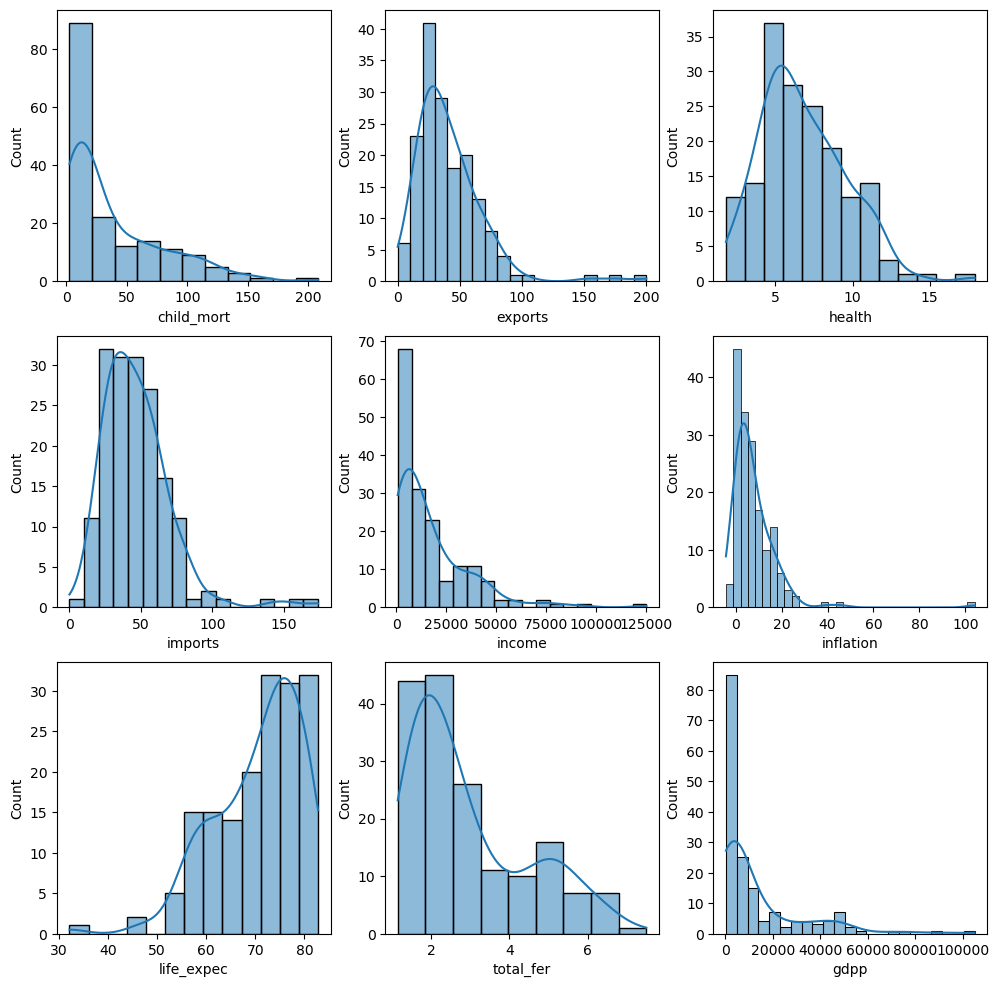

In [372]:
fig = plt.subplots(3, 3, figsize = (12,12))

for i in range(len(num_columns)):
    plt.subplot(3,3,i+1)
    sns.histplot(data[num_columns[i]], kde = True)
plt.show()

In [373]:
for i in num_columns:
    df = data[['country', i]].sort_values(ascending = False, by = i).head()
    display(df)

,country,child_mort
66,Haiti,208.0
132,Sierra Leone,160.0
32,Chad,150.0
31,Central African Republic,149.0
97,Mali,137.0


,country,exports
133,Singapore,200.0
91,Luxembourg,175.0
98,Malta,153.0
73,Ireland,103.0
131,Seychelles,93.8


,country,health
159,United States,17.9
101,"Micronesia, Fed. Sts.",14.2
132,Sierra Leone,13.1
110,Netherlands,11.9
54,France,11.9


,country,imports
133,Singapore,174.0
98,Malta,154.0
91,Luxembourg,142.0
131,Seychelles,108.0
87,Lesotho,101.0


,country,income
123,Qatar,125000
91,Luxembourg,91700
23,Brunei,80600
82,Kuwait,75200
133,Singapore,72100


,country,inflation
113,Nigeria,104.0
163,Venezuela,45.9
103,Mongolia,39.2
149,Timor-Leste,26.5
49,Equatorial Guinea,24.9


,country,life_expec
77,Japan,82.8
133,Singapore,82.7
145,Switzerland,82.2
68,Iceland,82.0
7,Australia,82.0


,country,total_fer
112,Niger,7.49
32,Chad,6.59
97,Mali,6.55
37,"Congo, Dem. Rep.",6.54
26,Burundi,6.26


,country,gdpp
91,Luxembourg,105000
114,Norway,87800
145,Switzerland,74600
123,Qatar,70300
44,Denmark,58000


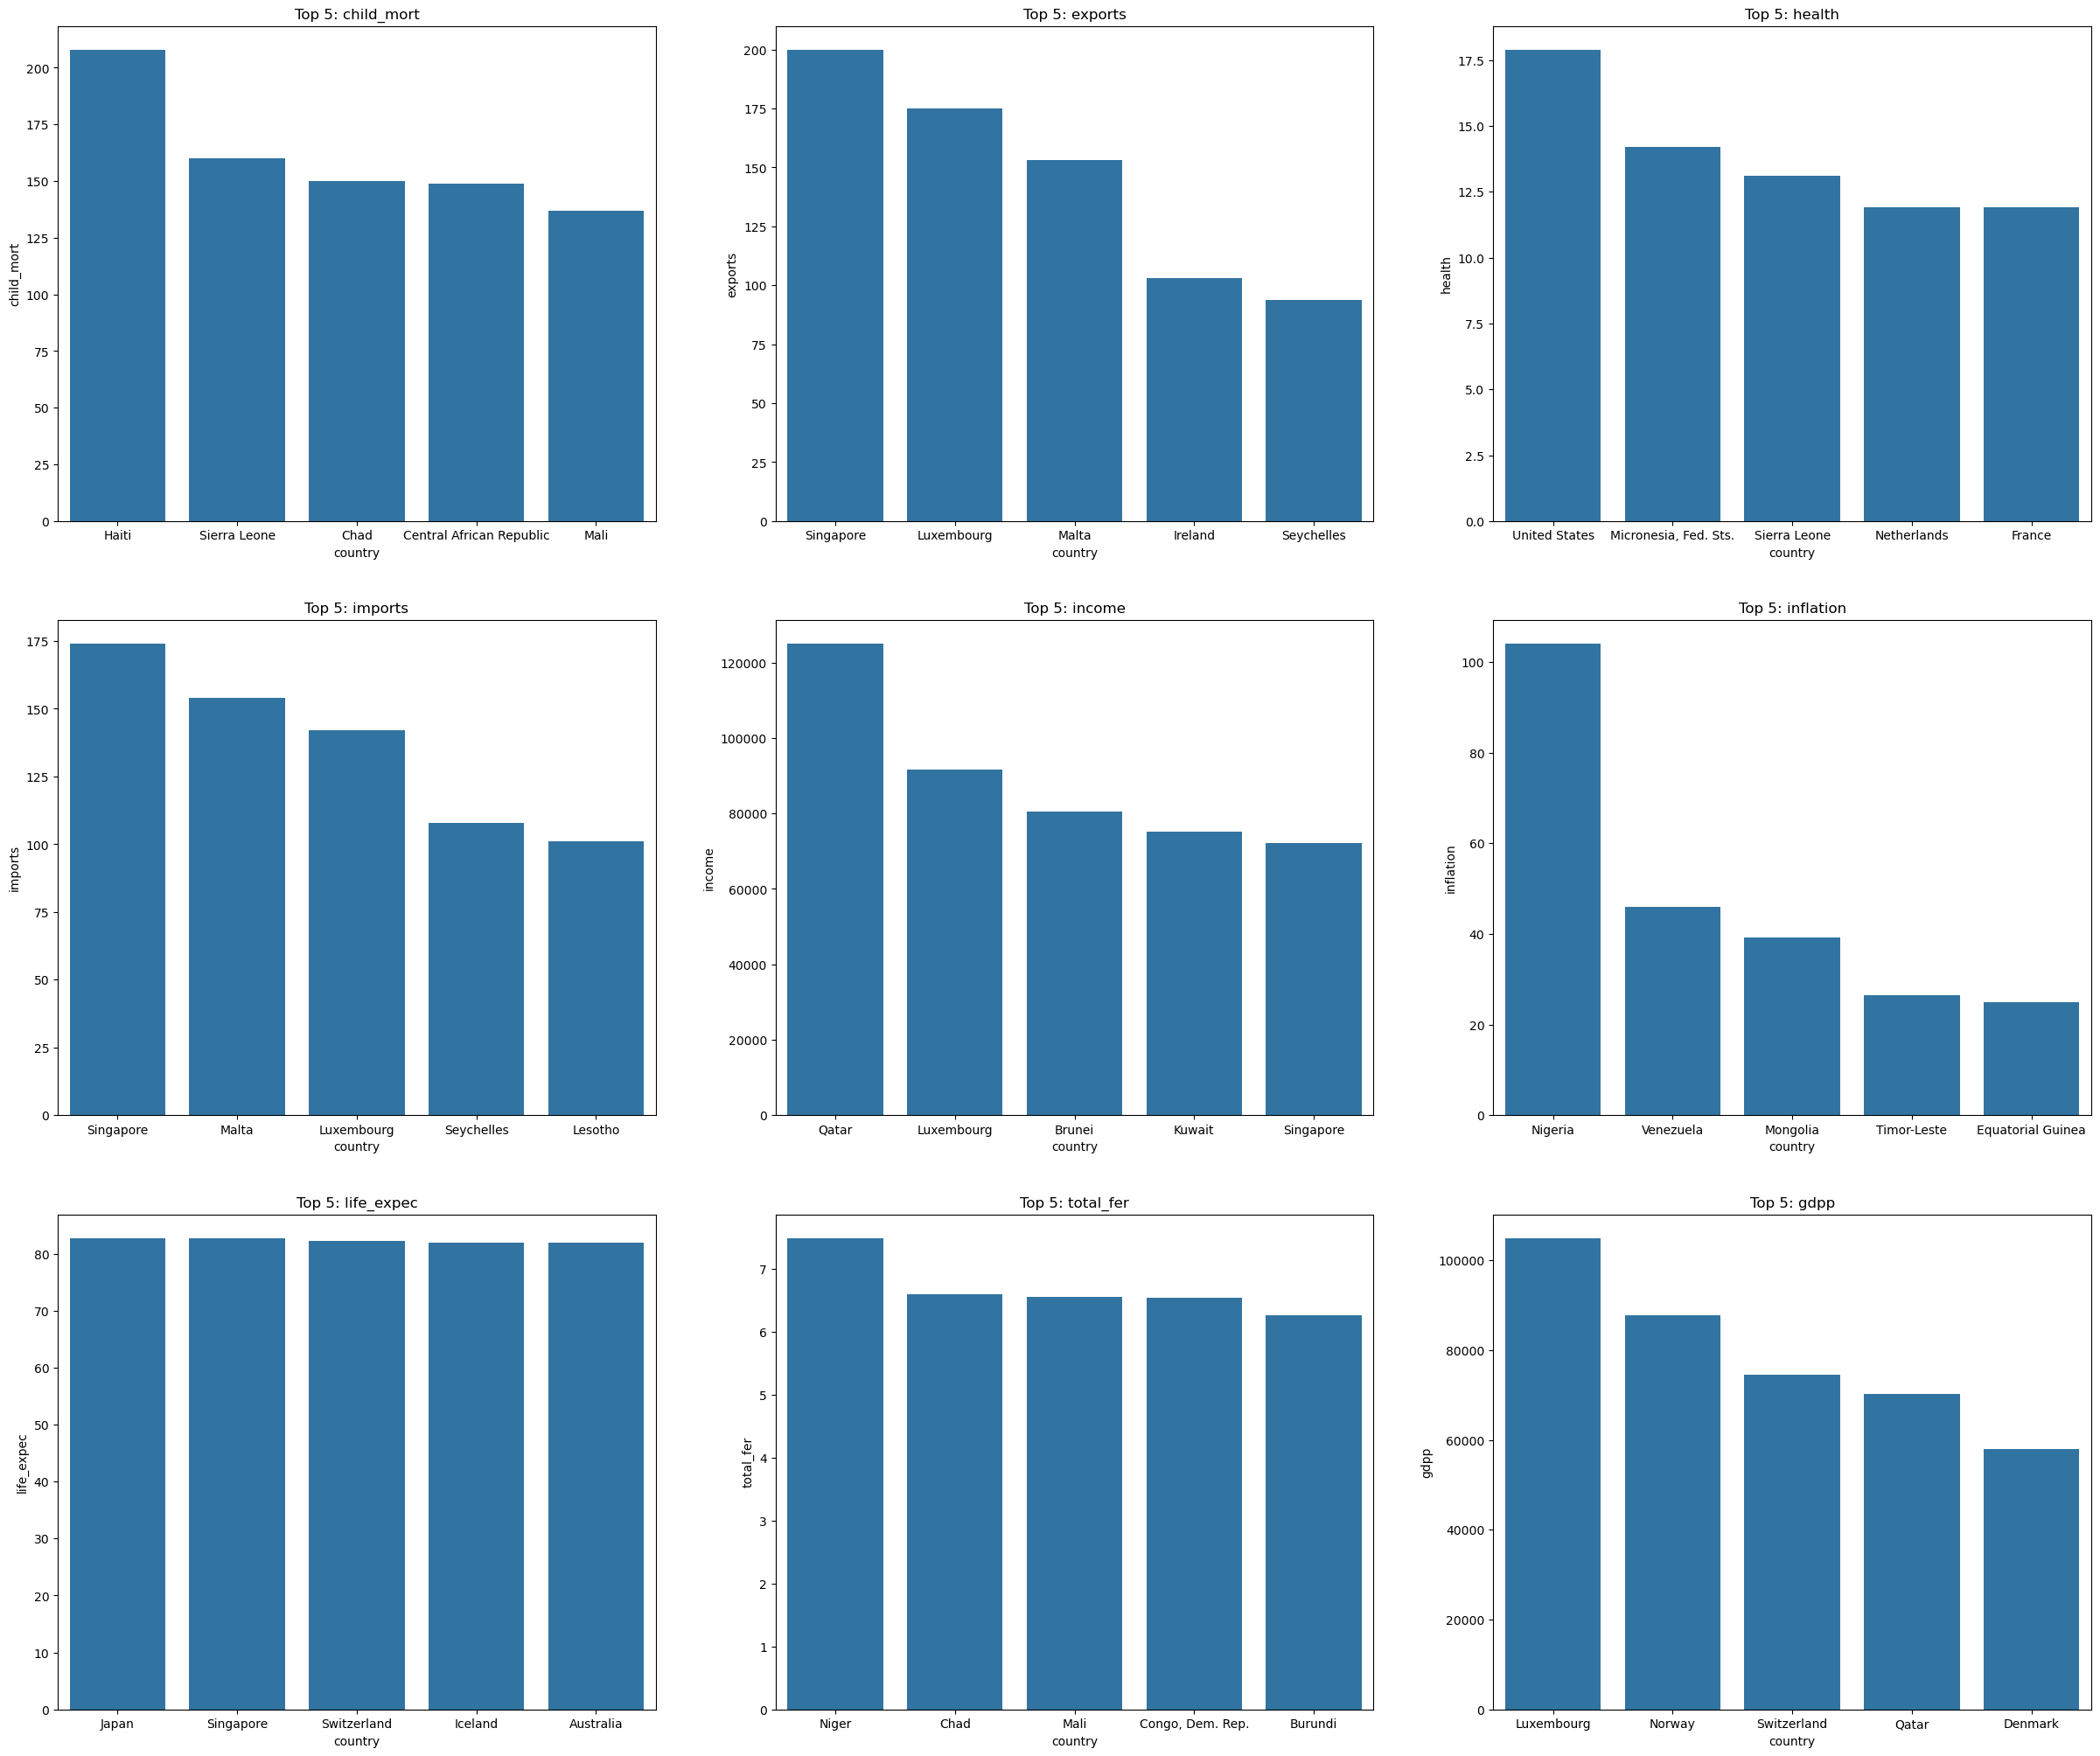

In [374]:
fig = plt.subplots(3, 3, figsize = (30,25))

for i in range(len(num_columns)):
    plt.subplot(3,3,i+1)
    sns.barplot(x = 'country',
                y = num_columns[i],
                data = data.sort_values(ascending = False, by = num_columns[i]).head())
    plt.title(f'Top 5: {num_columns[i]}')
plt.show()

2. Бинаризация, исключение среднего, масштабирование, нормализация, поиск и удаление дубликатов в данных.

In [376]:
#Масштабирование данных - Нормализация
n_scaler = MinMaxScaler()
data_norm = n_scaler.fit_transform(data.drop(['country'], axis = 1))

norm_df = pd.DataFrame(data_norm, columns = num_columns)
norm_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [377]:
norm_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.173661,0.205112,0.311106,0.269207,0.132933,0.110820,0.758495,0.283591,0.121536
std,0.196343,0.137135,0.170717,0.139188,0.154980,0.097687,0.175408,0.238777,0.174944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027507,0.118520,0.193288,0.173250,0.022076,0.055633,0.654832,0.101735,0.010490
50%,0.081305,0.174550,0.280298,0.248566,0.075174,0.088716,0.808679,0.198738,0.042274
75%,0.289679,0.256345,0.422001,0.337393,0.178397,0.138250,0.881657,0.430599,0.131900
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


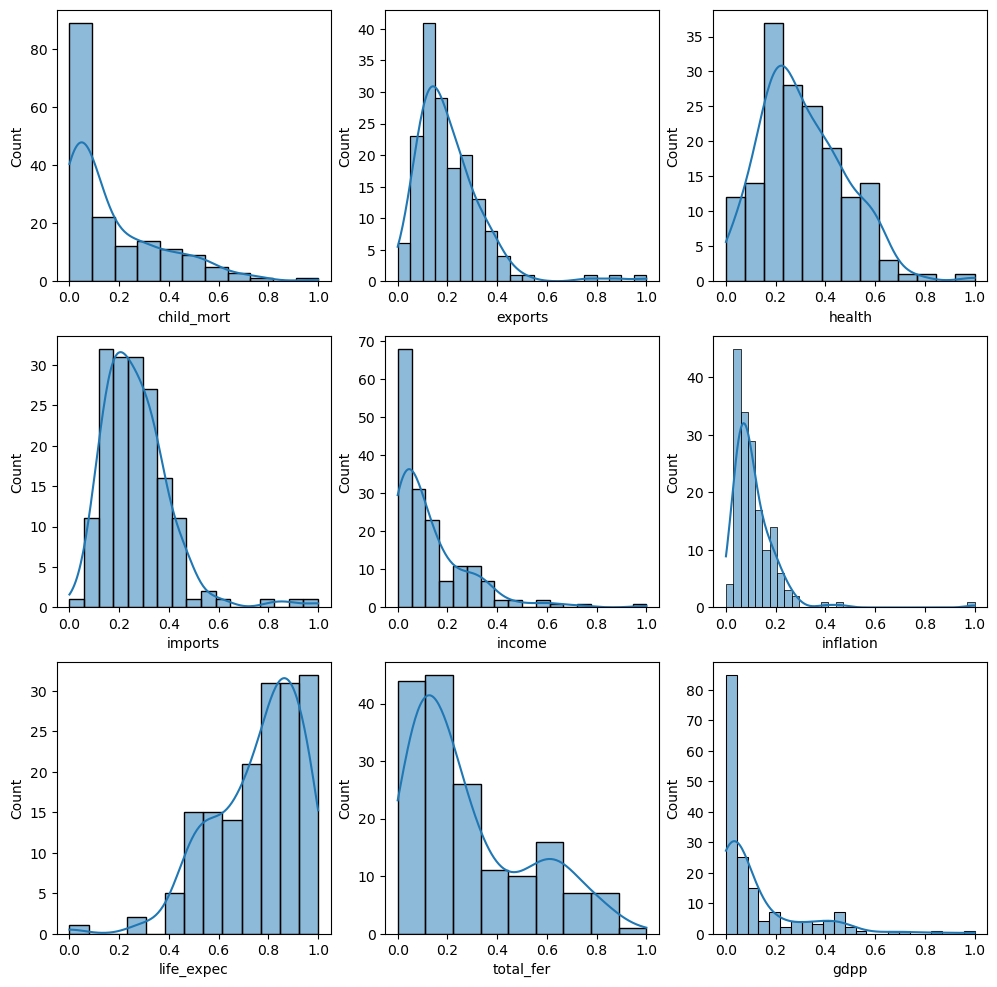

In [378]:
# Проверим распределения признаков
fig = plt.subplots(3, 3, figsize = (12,12))

for i in range(len(norm_df.columns)):
    plt.subplot(3,3,i+1)
    sns.histplot(norm_df[norm_df.columns[i]], kde = True)
plt.show()

In [379]:
#Масштабирование данных - Стандартизация

std_scaler = StandardScaler()
data_std = std_scaler.fit_transform(data.drop(['country'], axis = 1))

std_df = pd.DataFrame(data_std, columns = num_columns)
std_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [380]:
std_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-3.722904e-17,2.127373e-16,5.504579e-16,2.765585e-16,-7.977650e-17,-1.063687e-17,3.696311e-16,3.044803e-16,5.850277e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


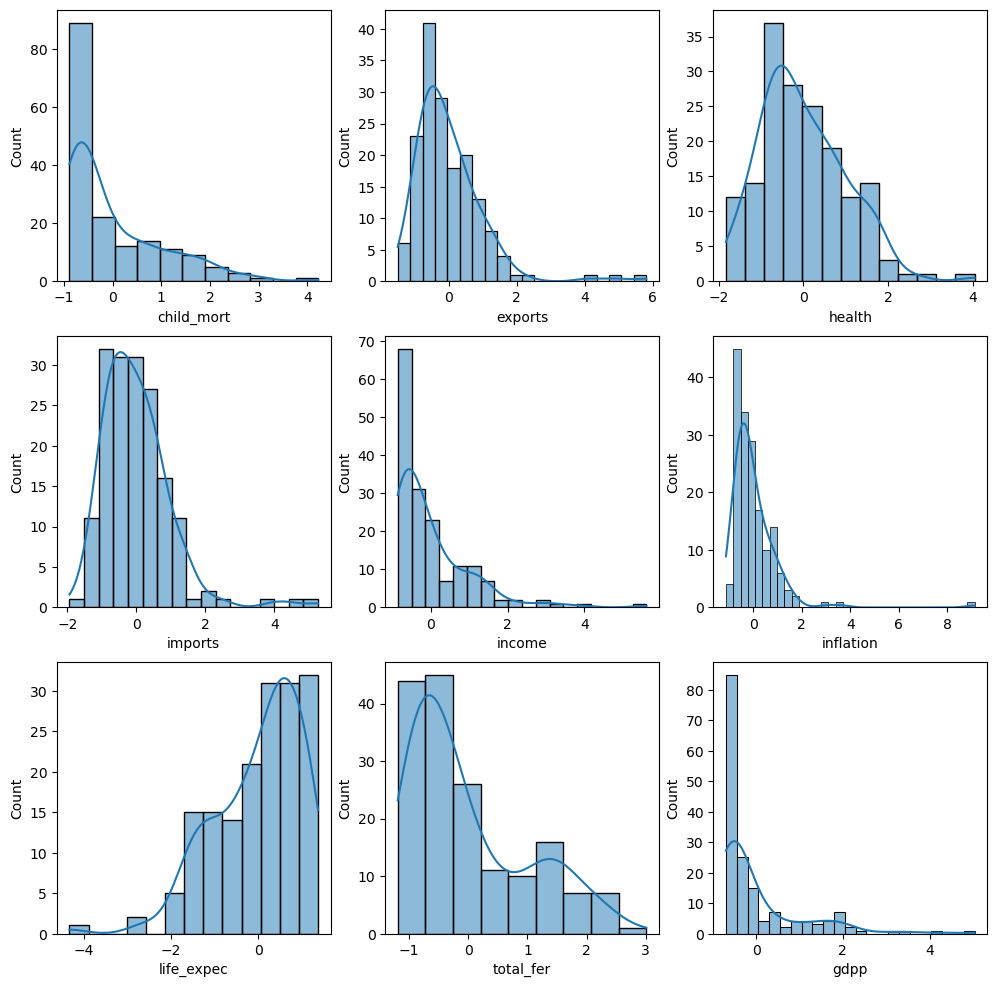

In [381]:
# Проверим распределения признаков
fig = plt.subplots(3, 3, figsize = (12,12))

for i in range(len(std_df.columns)):
    plt.subplot(3,3,i+1)
    sns.histplot(std_df[std_df.columns[i]], kde = True)
plt.show()

In [382]:
data.duplicated().sum()

0

3. Разведочный анализ данных: эмпирические распределения, выявление трендов, проверка гипотез о сезонности и независимости, определение статистических характеристик (квантили, выборочные моменты).

In [384]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<Axes: >

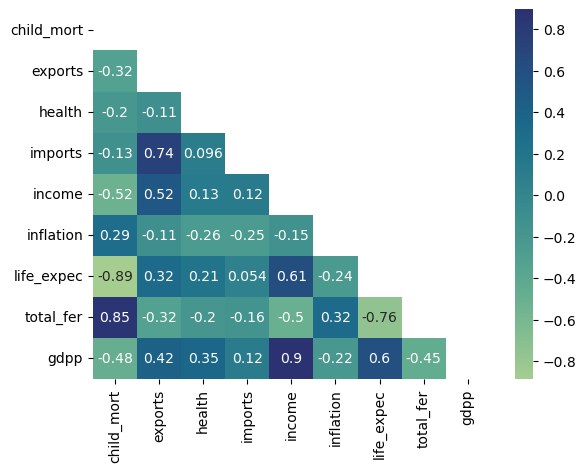

In [385]:
# Матрица корреляции
corr_data = data.drop(['country'], axis = 1).corr()
corr_matrix = np.triu(corr_data)

sns.heatmap(corr_data,  annot = True, cmap = 'crest', mask = corr_matrix)

4. Анализ и заполнение пропусков в данных.

In [387]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

5. Выявление и обработка выбросов, в том числе с использованием диаграмм размаха (boxplot).

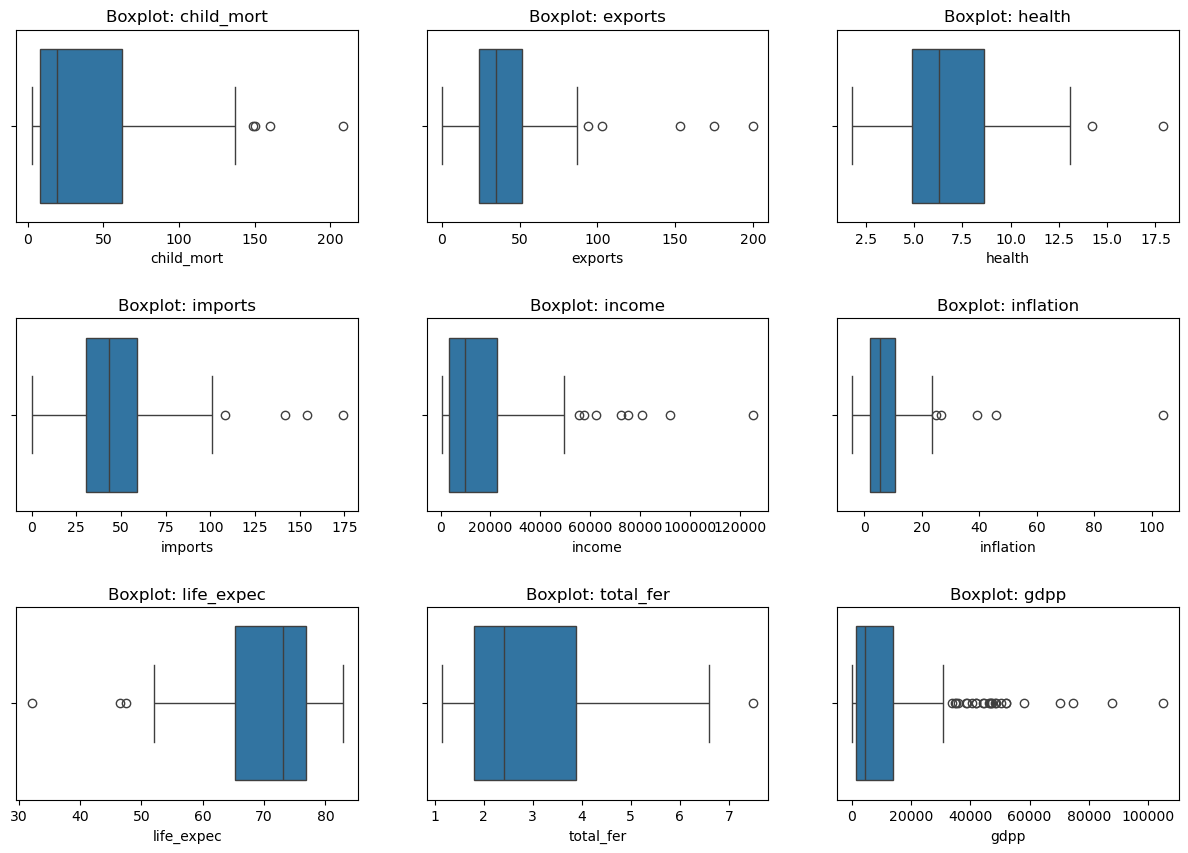

In [389]:
fig = plt.subplots(3, 3, figsize = (15,10))
plt.subplots_adjust(hspace = 0.5)

for i in range(len(num_columns)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = data[num_columns[i]])
    plt.title(f'Boxplot: {num_columns[i]}')
plt.show()

6. Реализовать методы: k-средних, k-медоидов, k-медиан, дендрограмм, иерархической агломеративной кластеризации Уорда, DBSCAN, смешанных гауссовских моделей (GMM)

In [391]:
df_ml = pd.DataFrame()
df_ml['health'] = norm_df.child_mort + norm_df.health + norm_df.life_expec + norm_df.total_fer
df_ml['trade'] = norm_df.imports + norm_df.exports
df_ml['finance'] = norm_df.income + norm_df.inflation + norm_df.gdpp

df_ml.head()

,health,trade,finance
0,1.997031,0.307247,0.137264
1,1.313412,0.418568,0.192166
2,1.417116,0.371709,0.326865
3,1.973825,0.557391,0.319934
4,1.335993,0.565334,0.315107


In [392]:
header = df_ml.columns

In [393]:
data_ml = n_scaler.fit_transform(df_ml)

modeling_data = pd.DataFrame(data_ml, columns = header)
modeling_data.head()

,health,trade,finance
0,0.630928,0.153623,0.045875
1,0.181535,0.209284,0.077291
2,0.249707,0.185854,0.154369
3,0.615673,0.278695,0.150404
4,0.196379,0.282667,0.147641


In [394]:
modeling_data.describe()

,health,trade,finance
count,167.000000,167.000000,167.000000
mean,0.321845,0.237159,0.176357
std,0.200875,0.128772,0.181569
min,0.000000,0.000000,0.000000
25%,0.173552,0.154721,0.058679
50%,0.280606,0.211995,0.107301
75%,0.408987,0.287903,0.237638
max,1.000000,1.000000,1.000000


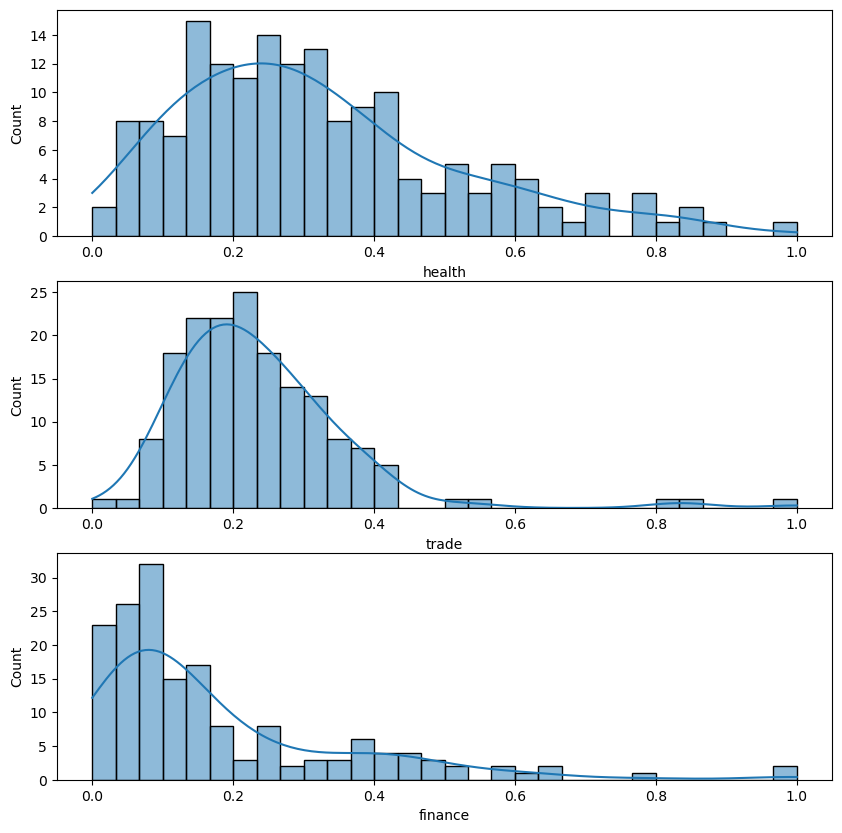

In [395]:
fig = plt.subplots(3, 1, figsize = (10,10))

for i in range(len(modeling_data.columns)):
    plt.subplot(3,1,i+1)
    sns.histplot(modeling_data[modeling_data.columns[i]], kde = True, bins = 30)
plt.show()

In [396]:
df_country = modeling_data.copy()
df_country['country'] = data.country
df_country.head()

,health,trade,finance,country
0,0.630928,0.153623,0.045875,Afghanistan
1,0.181535,0.209284,0.077291,Albania
2,0.249707,0.185854,0.154369,Algeria
3,0.615673,0.278695,0.150404,Angola
4,0.196379,0.282667,0.147641,Antigua and Barbuda


### K-средних

In [398]:
model = KMeans(n_clusters = 3, max_iter = 500)
model.fit(modeling_data)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

kmeans_data = df_country.copy()
kmeans_data['Class'] = labels

Text(0, 0.5, 'Finance')

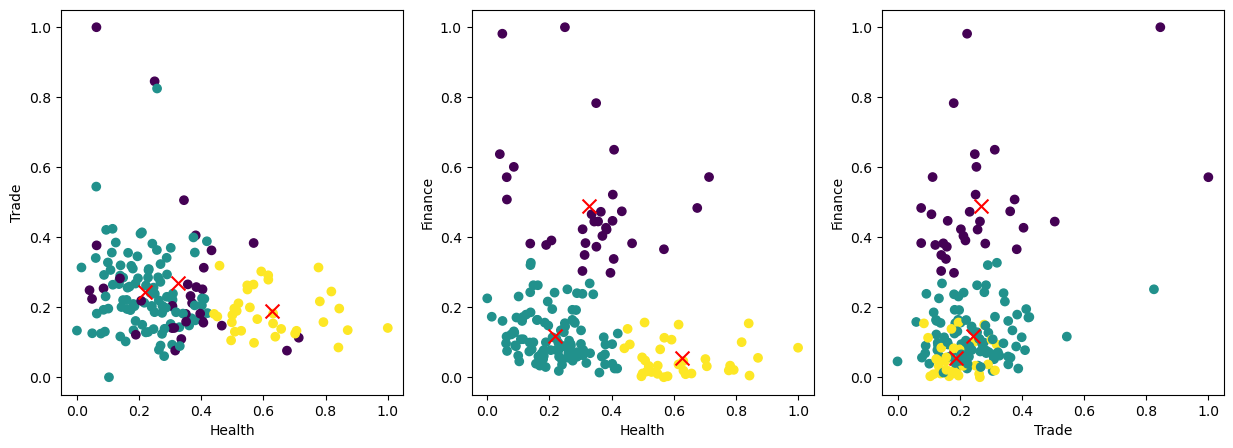

In [399]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))

x = np.array(modeling_data['health'])
y = np.array(modeling_data['trade'])
z = np.array(modeling_data['finance'])

plt.subplot(1, 3, 1)
plt.scatter(x, y, c = labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color="red", s = 100)
plt.xlabel('Health')
plt.ylabel('Trade')


plt.subplot(1, 3, 2)
plt.scatter(x, z, c = labels)
plt.scatter(centroids[:, 0], centroids[:, 2], marker="x", color="red", s = 100)
plt.xlabel('Health')
plt.ylabel('Finance')

plt.subplot(1, 3, 3)
plt.scatter(y, z, c = labels)
plt.scatter(centroids[:, 1], centroids[:, 2], marker="x", color="red", s = 100)
plt.xlabel('Trade')
plt.ylabel('Finance')

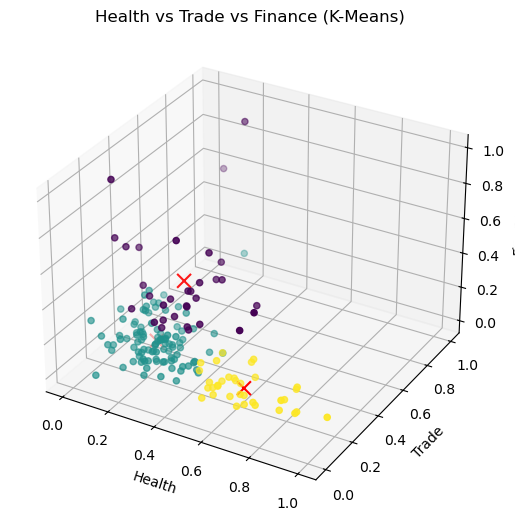

In [400]:
fig = plt.figure()
ax = fig.add_axes(Axes3D(fig))
x = np.array(modeling_data['health'])
y = np.array(modeling_data['trade'])
z = np.array(modeling_data['finance'])
ax.scatter(x,y,z,c = labels)
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], marker="x", color = 'red', s = 100)
plt.title('Health vs Trade vs Finance (K-Means)')
ax.set_xlabel('Health')
ax.set_ylabel('Trade')
ax.set_zlabel('Finance')
plt.show();

### К-медоидов

In [402]:
kmedoids = KMedoids(n_clusters = 3, random_state = 0).fit(modeling_data)
kmedoids_label = kmedoids.labels_
centres = kmedoids.cluster_centers_

kmedoids_data = df_country.copy()
kmedoids_data['Class'] = kmedoids_label

Text(0, 0.5, 'Finance')

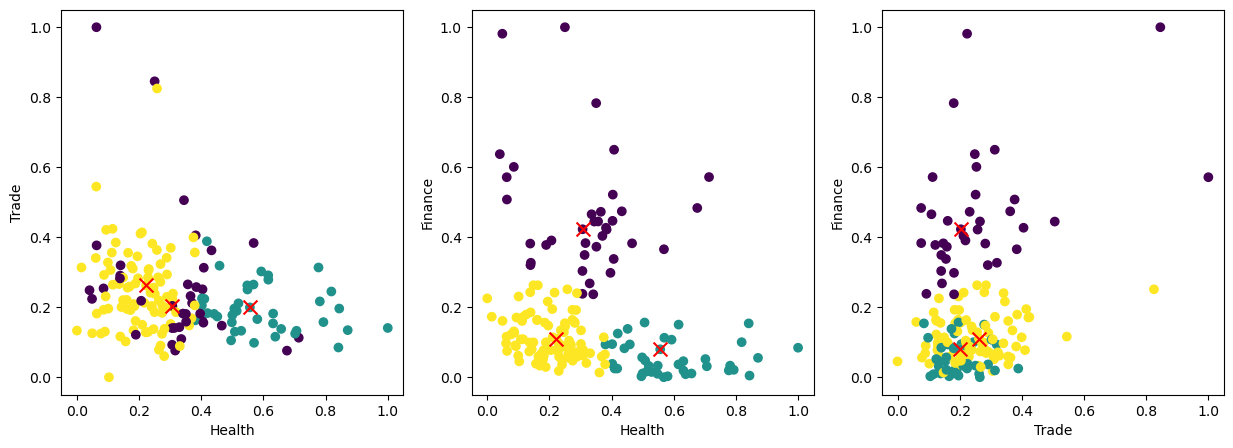

In [403]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))

x = np.array(kmedoids_data['health'])
y = np.array(kmedoids_data['trade'])
z = np.array(kmedoids_data['finance'])

plt.subplot(1, 3, 1)
plt.scatter(x, y, c = kmedoids_label)
plt.scatter(centres[:, 0], centres[:, 1], marker="x", color="red", s = 100)
plt.xlabel('Health')
plt.ylabel('Trade')


plt.subplot(1, 3, 2)
plt.scatter(x, z, c = kmedoids_label)
plt.scatter(centres[:, 0], centres[:, 2], marker="x", color="red", s = 100)
plt.xlabel('Health')
plt.ylabel('Finance')

plt.subplot(1, 3, 3)
plt.scatter(y, z, c = kmedoids_label)
plt.scatter(centres[:, 1], centres[:, 2], marker="x", color="red", s = 100)
plt.xlabel('Trade')
plt.ylabel('Finance')

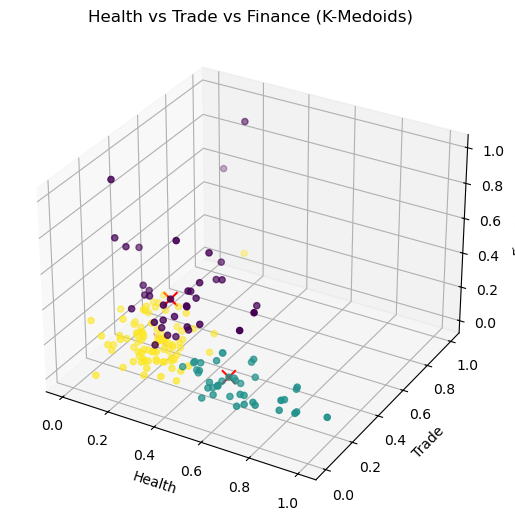

In [404]:
fig = plt.figure()
ax = fig.add_axes(Axes3D(fig))
x = np.array(kmedoids_data['health'])
y = np.array(kmedoids_data['trade'])
z = np.array(kmedoids_data['finance'])
ax.scatter(x,y,z,c = kmedoids_label)
ax.scatter(centres[:,0], centres[:,1], centres[:,2], marker="x", color = 'red', s = 100)
plt.title('Health vs Trade vs Finance (K-Medoids)')
ax.set_xlabel('Health')
ax.set_ylabel('Trade')
ax.set_zlabel('Finance')
plt.show()

### К-медиан

In [406]:
pca = PCA(n_components = 3)

modeling_data_scaled = pca.fit_transform(modeling_data)
[initial_centers, indexes] = kmeans_plusplus(modeling_data_scaled,n_clusters = 3,random_state = 9)

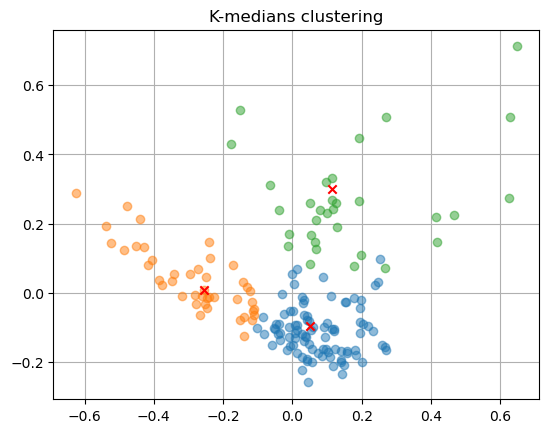

In [407]:
kmeans_instance = kmeans(modeling_data_scaled,initial_centers)
kmeans_instance.process();
centroids = np.array(kmeans_instance.get_centers()); 
kmeans_clusters = kmeans_instance.get_clusters()

kmedians_instance = kmedians(modeling_data_scaled,initial_centers); 
kmedians_instance.process();
medians = np.array(kmedians_instance.get_medians()); 
kmedians_clusters = kmedians_instance.get_clusters() 

kmedians_labels = np.zeros([modeling_data.shape[0]],dtype='int64')

plt.figure()
ax = plt.axes()
for i in range(3):
    kmedians_labels[kmeans_clusters[i]]=i
    ax.scatter(modeling_data_scaled[kmedians_clusters[i],0],modeling_data_scaled[kmedians_clusters[i],1],alpha=0.5,zorder=2)
ax.scatter(medians[:,0], medians[:,1], marker='x', color = 'red', zorder=3);
ax.set_aspect('equal')
ax.grid(visible=True,zorder=1)
ax.set(title='K-medians clustering')
plt.show()

In [408]:
kmedians_data = df_country.copy()
kmedians_data['Class'] = kmedians_labels

### Дендограмма

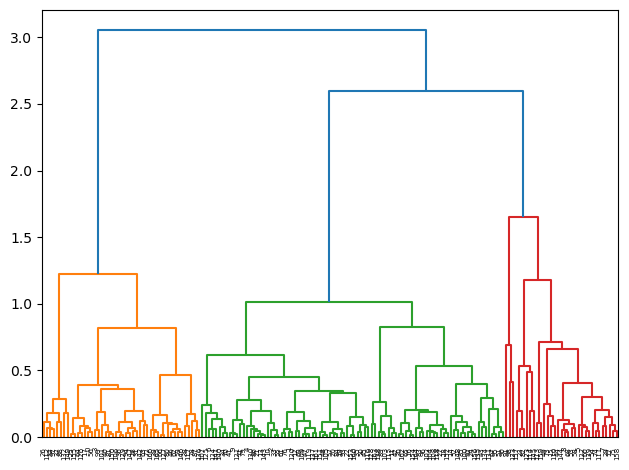

In [410]:
linkage_data = linkage(modeling_data, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

### Иерархической агломеративной кластеризации Уорда

In [412]:
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3,  
                                               linkage = 'ward')
labels = hierarchical_cluster.fit(modeling_data)

pred_agc = pd.Series(hierarchical_cluster.labels_)

ward_data = df_country.copy()
ward_data['Class'] = pred_agc

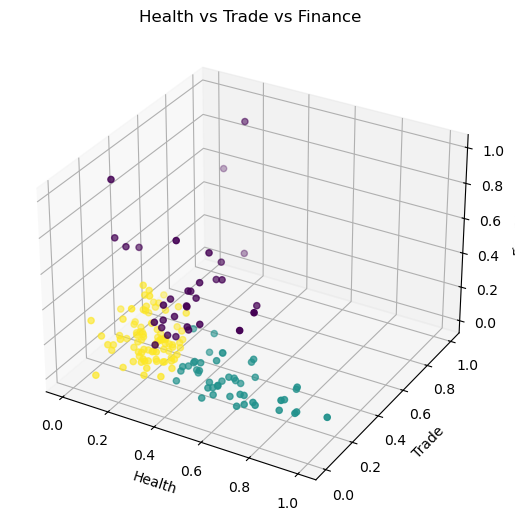

In [413]:
fig = plt.figure()
ax = fig.add_axes(Axes3D(fig))
x = np.array(ward_data['health'])
y = np.array(ward_data['trade'])
z = np.array(ward_data['finance'])
ax.scatter(x,y,z,c = ward_data['Class'])
plt.title('Health vs Trade vs Finance')
ax.set_xlabel('Health')
ax.set_ylabel('Trade')
ax.set_zlabel('Finance')
plt.show();

### DBSCAN

In [415]:
db = DBSCAN(eps = 0.1, min_samples = 2).fit(modeling_data)
db_labels = db.labels_

n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise_ = list(db_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

Estimated number of clusters: 3
Estimated number of noise points: 16


In [416]:
db_data = df_country.copy()
db_data['class'] = db_labels

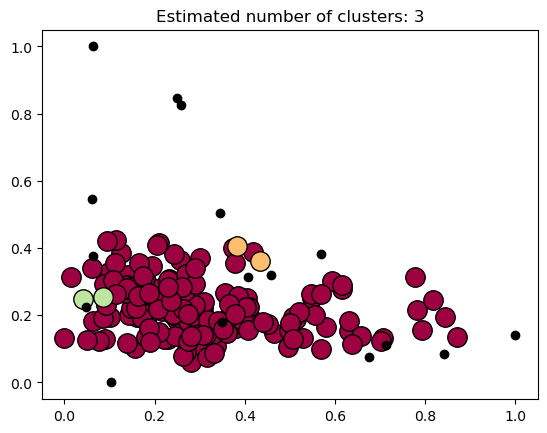

In [417]:
unique_labels = set(db_labels)
core_samples_mask = np.zeros_like(db_labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = db_labels == k

    xy = db_data[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = db_data[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

### GMM

In [419]:
gmm = GaussianMixture(n_components = 3)
gmm.fit(modeling_data)
labels_gmm = gmm.predict(modeling_data)

gmm_data = df_country.copy()
gmm_data['class'] = labels_gmm

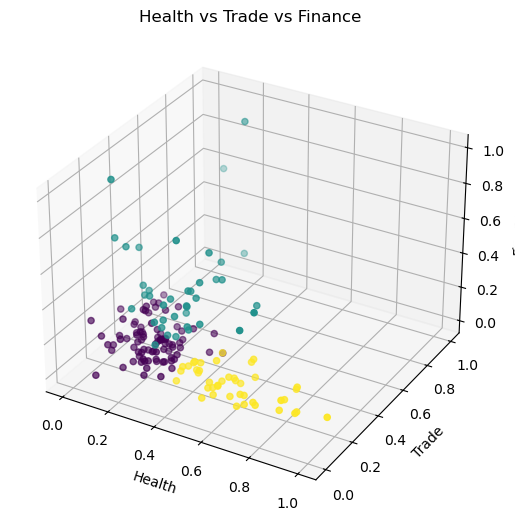

In [420]:
fig = plt.figure()
ax = fig.add_axes(Axes3D(fig))
x = np.array(modeling_data['health'])
y = np.array(modeling_data['trade'])
z = np.array(modeling_data['finance'])
ax.scatter(x, y, z, c = labels_gmm)
plt.title('Health vs Trade vs Finance')
ax.set_xlabel('Health')
ax.set_ylabel('Trade')
ax.set_zlabel('Finance')
plt.show();

7. Реализовать процедуру выбора оптимального числа кластеров разбиения с помощью информационных критериев и других методов, включая «метод локтя».

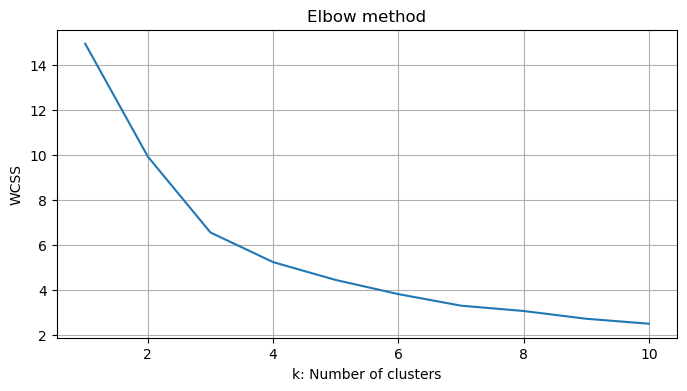

In [422]:
# Метод локтя
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(modeling_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (8,4))
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('k: Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

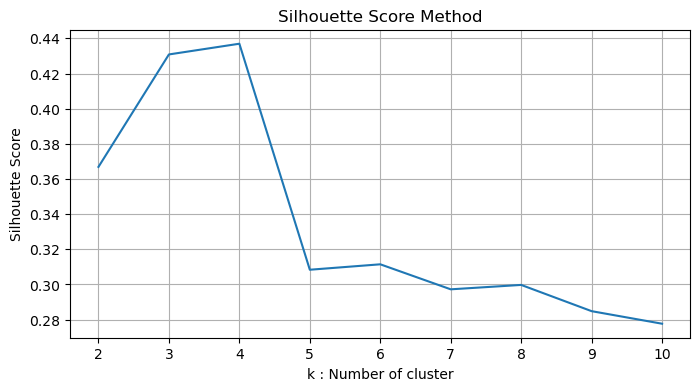

In [423]:
# Метод силуэта
sil = []

for i in range(2,11):
    kmeans = KMeans(n_clusters = i).fit(modeling_data)
    labels = kmeans.labels_
    sil.append(silhouette_score(modeling_data, labels, metric = 'euclidean'))

plt.figure(figsize = (8,4))
plt.plot(range(2,11), sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

8. Провести сравнение результатов на выбранных пользовательских данных.

Text(0.5, 1.0, 'Finance per Class')

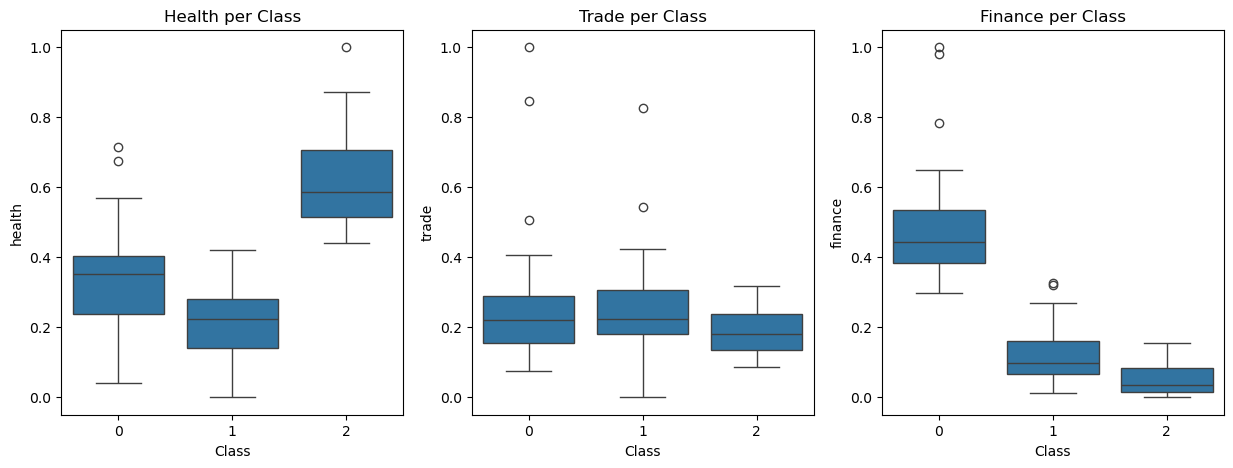

In [425]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))

plt.subplot(1, 3, 1)
sns.boxplot(data = kmeans_data, x = 'Class', y = 'health')
plt.title('Health per Class')

plt.subplot(1, 3, 2)
sns.boxplot(data = kmeans_data, x = 'Class', y = 'trade')
plt.title('Trade per Class')

plt.subplot(1, 3, 3)
sns.boxplot(data = kmeans_data, x = 'Class', y = 'finance')
plt.title('Finance per Class')

Text(0.5, 1.0, 'Finance per Class')

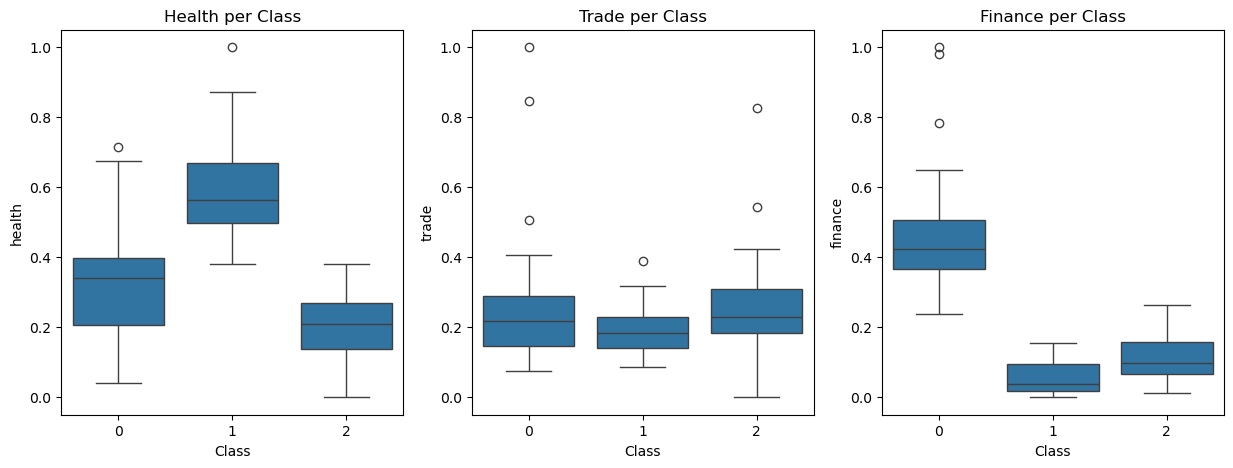

In [426]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))

plt.subplot(1, 3, 1)
sns.boxplot(data = kmedoids_data, x = 'Class', y = 'health')
plt.title('Health per Class')

plt.subplot(1, 3, 2)
sns.boxplot(data = kmedoids_data, x = 'Class', y = 'trade')
plt.title('Trade per Class')

plt.subplot(1, 3, 3)
sns.boxplot(data = kmedoids_data, x = 'Class', y = 'finance')
plt.title('Finance per Class')

Text(0.5, 1.0, 'Finance per Class')

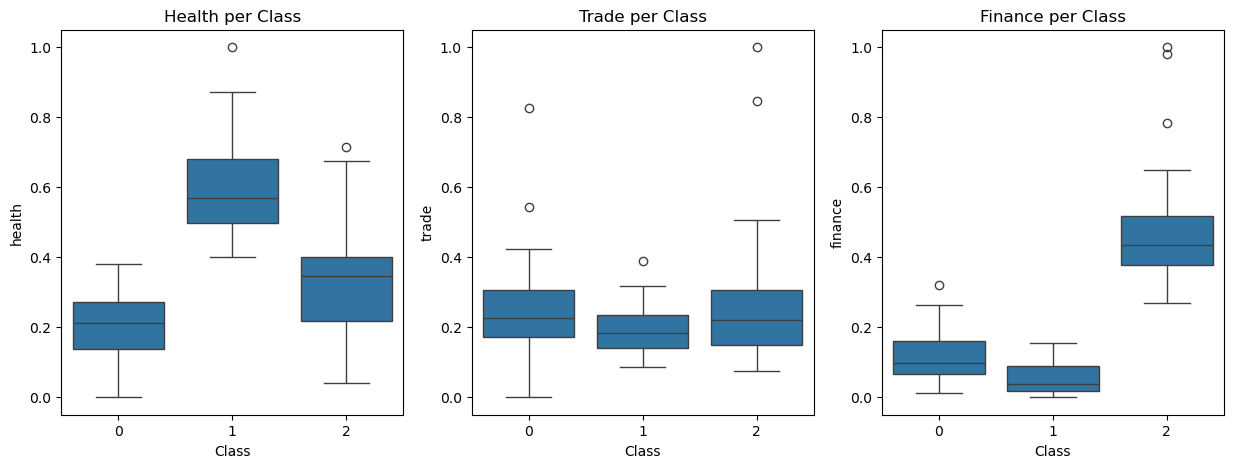

In [427]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))

plt.subplot(1, 3, 1)
sns.boxplot(data = kmedians_data, x = 'Class', y = 'health')
plt.title('Health per Class')

plt.subplot(1, 3, 2)
sns.boxplot(data = kmedians_data, x = 'Class', y = 'trade')
plt.title('Trade per Class')

plt.subplot(1, 3, 3)
sns.boxplot(data = kmedians_data, x = 'Class', y = 'finance')
plt.title('Finance per Class')

Text(0.5, 1.0, 'Finance per Class')

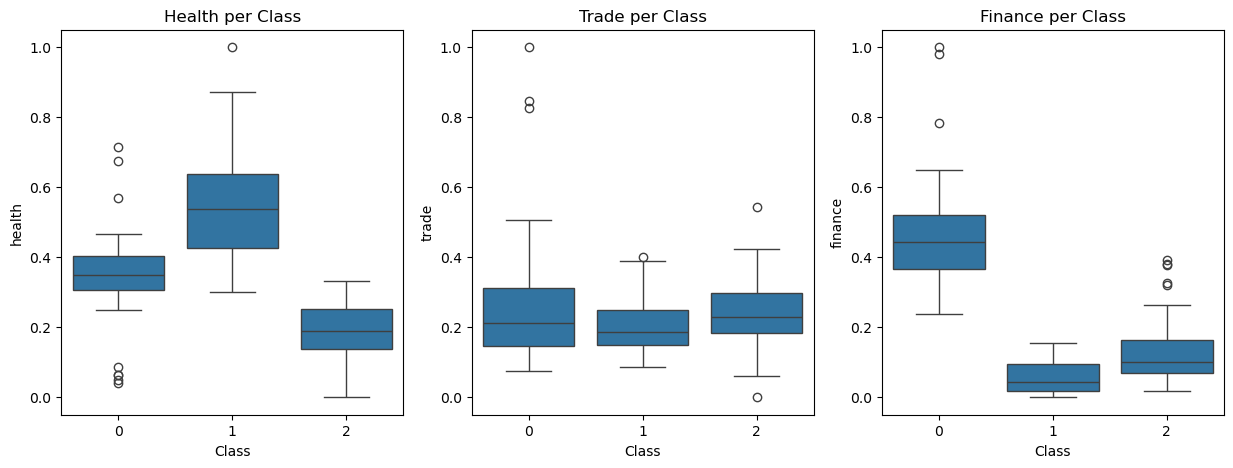

In [428]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))

plt.subplot(1, 3, 1)
sns.boxplot(data = ward_data, x = 'Class', y = 'health')
plt.title('Health per Class')

plt.subplot(1, 3, 2)
sns.boxplot(data = ward_data, x = 'Class', y = 'trade')
plt.title('Trade per Class')

plt.subplot(1, 3, 3)
sns.boxplot(data = ward_data, x = 'Class', y = 'finance')
plt.title('Finance per Class')

In [429]:
#fig, ax = plt.subplots(1, 3, figsize = (15,5))

#plt.subplot(1, 3, 1)
#sns.boxplot(data = db_data, x = 'class', y = 'health')
#plt.title('Health per Class')

#plt.subplot(1, 3, 2)
#sns.boxplot(data = db_data, x = 'class', y = 'trade')
#plt.title('Trade per Class')

#plt.subplot(1, 3, 3)
#sns.boxplot(data = db_data, x = 'class', y = 'finance')
#plt.title('Finance per Class')

Text(0.5, 1.0, 'Finance per Class')

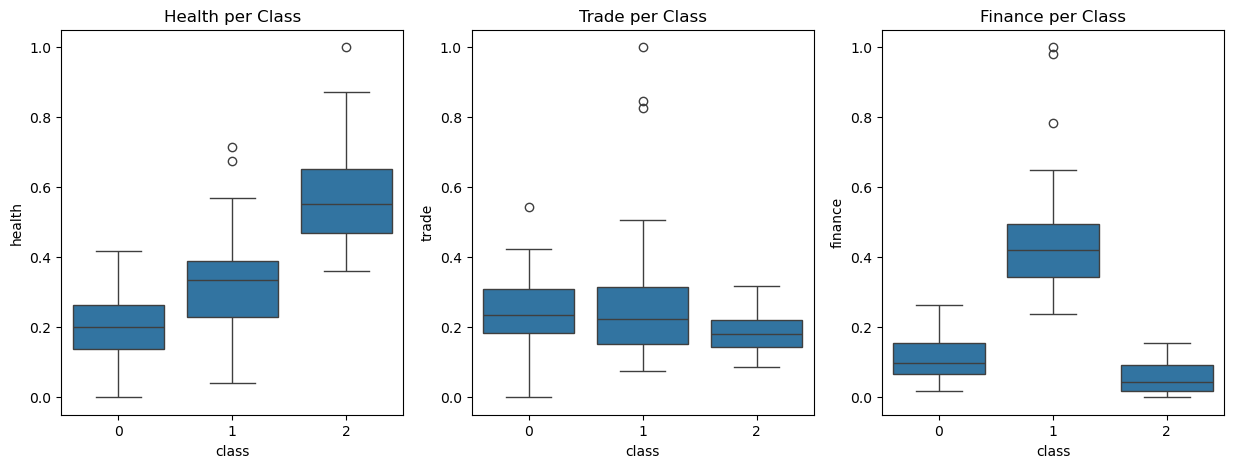

In [430]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))

plt.subplot(1, 3, 1)
sns.boxplot(data = gmm_data, x = 'class', y = 'health')
plt.title('Health per Class')

plt.subplot(1, 3, 2)
sns.boxplot(data = gmm_data, x = 'class', y = 'trade')
plt.title('Trade per Class')

plt.subplot(1, 3, 3)
sns.boxplot(data = gmm_data, x = 'class', y = 'finance')
plt.title('Finance per Class')

9. Самостоятельно программно реализовать какие-либо методы кластеризации.

In [586]:
X, y = make_blobs(n_samples=100, random_state=8)

In [590]:
X.shape

(100, 2)

In [594]:
y

array([2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1, 1, 0, 0,
       0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1,
       0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 2, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0,
       0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1])

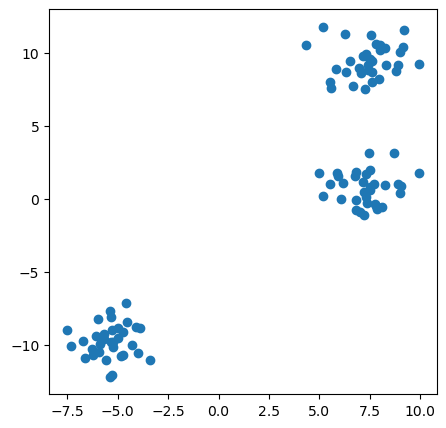

In [515]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1])

In [517]:
def KMeans_r(X, k=3, num_iter=10, min_distance=1e-4, seed=0):
    np.random.seed(seed)
    centroid_ids = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[centroid_ids]

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)    
        
        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        print(len(clusters[0]), len(clusters[1]), len(clusters[2]))
        print(new_centroids)

        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        if is_stop:
            print(f'stopping at iter {i}')
            break

        centroids = new_centroids.copy()

    return centroids, clusters

In [519]:
centroids, clusters = KMeans_r(X)
centroids

72 18 10
[[  6.47695508   4.250812  ]
 [ -4.90974936  -9.74138308]
 [ -6.28632331 -10.67296216]]
67 22 11
[[  7.34579041   5.15987867]
 [ -4.92484923  -9.32066871]
 [ -6.24720273 -10.6066557 ]]
67 21 12
[[  7.34579041   5.15987867]
 [ -4.92789407  -9.2514691 ]
 [ -6.13167815 -10.62058943]]
67 20 13
[[  7.34579041   5.15987867]
 [ -4.93666973  -9.17876918]
 [ -6.02557834 -10.62711852]]
67 19 14
[[  7.34579041   5.15987867]
 [ -4.92220528  -9.12748265]
 [ -5.96742948 -10.59326814]]
67 19 14
[[  7.34579041   5.15987867]
 [ -4.92220528  -9.12748265]
 [ -5.96742948 -10.59326814]]
stopping at iter 5


array([[  7.34579041,   5.15987867],
       [ -4.92220528,  -9.12748265],
       [ -5.96742948, -10.59326814]])

In [521]:
centroids, clusters = KMeans_r(X, seed=1)
centroids

33 51 16
[[-5.36563373 -9.74933104]
 [ 7.84553505  4.99012755]
 [ 5.75285435  5.70096037]]
33 40 27
[[-5.36563373 -9.74933104]
 [ 7.67644301  2.47281434]
 [ 6.85593471  9.14071471]]
33 33 34
[[-5.36563373 -9.74933104]
 [ 7.29448151  0.73273492]
 [ 7.39559022  9.45681231]]
33 33 34
[[-5.36563373 -9.74933104]
 [ 7.29448151  0.73273492]
 [ 7.39559022  9.45681231]]
stopping at iter 3


array([[-5.36563373, -9.74933104],
       [ 7.29448151,  0.73273492],
       [ 7.39559022,  9.45681231]])

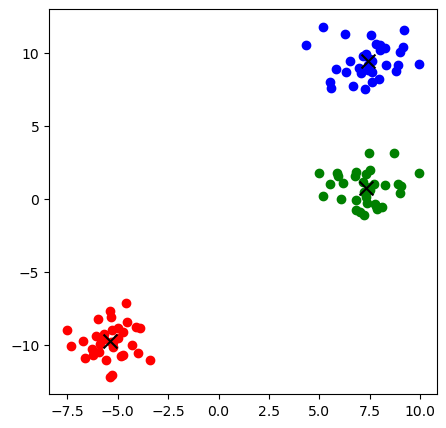

In [523]:
colors = ['r','g','b']

plt.figure(figsize=(5, 5))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='x', s=100, c='black')

In [524]:
from sklearn.cluster import KMeans as sk_KMeans

In [525]:
model = sk_KMeans(n_clusters=3, 
                  init='k-means++',
                  max_iter=10,
                  random_state=0)

model.fit(X)

KMeans(max_iter=10, n_clusters=3, random_state=0)

In [529]:
r_labels = model.predict(X)
r_labels[:10]

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 2])

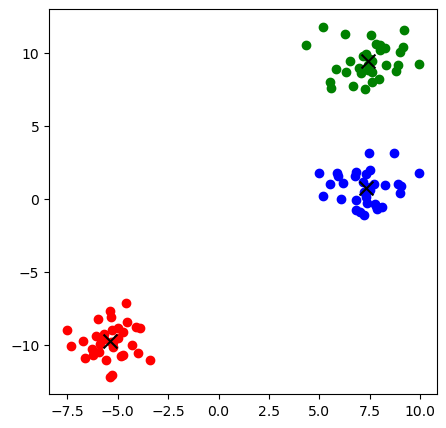

In [531]:
plt.figure(figsize=(5, 5))

for i in range(len(r_labels)):
    plt.scatter(X[i, 0], X[i, 1], color=colors[r_labels[i]])

for i, centr in enumerate(model.cluster_centers_):
    plt.scatter(centr[0], centr[1], marker='x', s=100, c='black')

Проверка

In [534]:
# Для измененных данных (3 признака)
s_score = {}

s_score['KMeans'] = silhouette_score(modeling_data, kmeans_data['Class'])
s_score['KMedoids'] = silhouette_score(modeling_data, kmedoids_label)
s_score['KMedians'] = silhouette_score(modeling_data, kmedians_labels)
s_score['Ward'] = silhouette_score(modeling_data, pred_agc)
s_score['DBSCAN'] = silhouette_score(modeling_data, db_labels)
s_score['GMM'] = silhouette_score(modeling_data, labels_gmm)

s_score

{'KMeans': 0.4326983368717661,
 'KMedoids': 0.4122344923522201,
 'KMedians': 0.42163599568865107,
 'Ward': 0.39941026898091964,
 'DBSCAN': 0.21122653081677373,
 'GMM': 0.40312911052391553}

In [536]:
norm_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.173661,0.205112,0.311106,0.269207,0.132933,0.110820,0.758495,0.283591,0.121536
std,0.196343,0.137135,0.170717,0.139188,0.154980,0.097687,0.175408,0.238777,0.174944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027507,0.118520,0.193288,0.173250,0.022076,0.055633,0.654832,0.101735,0.010490
50%,0.081305,0.174550,0.280298,0.248566,0.075174,0.088716,0.808679,0.198738,0.042274
75%,0.289679,0.256345,0.422001,0.337393,0.178397,0.138250,0.881657,0.430599,0.131900
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [538]:
n_df_model = KMeans(n_clusters = 3, max_iter = 500)
n_df_model.fit(norm_df)
n_df_cluster = n_df_model.cluster_centers_
n_df_centroids = np.array(cluster)
n_df_labels = n_df_model.labels_

n_df_kmeans_data = norm_df.copy()
n_df_kmeans_data['Class'] = n_df_labels

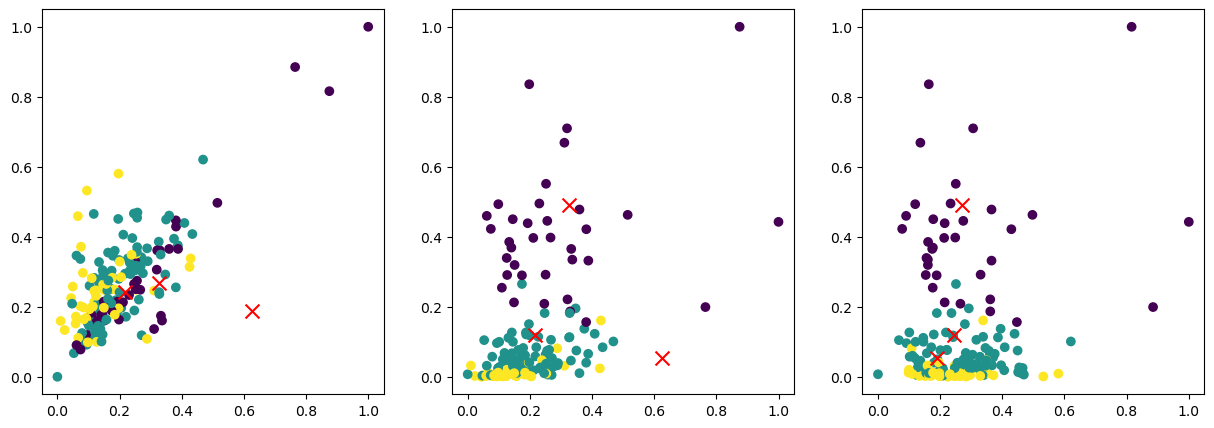

In [540]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))

x = np.array(n_df_kmeans_data['exports'])
y = np.array(n_df_kmeans_data['imports'])
z = np.array(n_df_kmeans_data['gdpp'])

plt.subplot(1, 3, 1)
plt.scatter(x, y, c = n_df_labels)
plt.scatter(n_df_centroids[:, 0], n_df_centroids[:, 1], marker="x", color="red", s = 100)
#plt.xlabel('---')
#plt.ylabel('---')


plt.subplot(1, 3, 2)
plt.scatter(x, z, c = n_df_labels)
plt.scatter(n_df_centroids[:, 0], n_df_centroids[:, 2], marker="x", color="red", s = 100)
#plt.xlabel('Health')
#plt.ylabel('Finance')

plt.subplot(1, 3, 3)
plt.scatter(y, z, c = n_df_labels)
plt.scatter(n_df_centroids[:, 1], n_df_centroids[:, 2], marker="x", color="red", s = 100)
#plt.xlabel('Trade')
#plt.ylabel('Finance')

In [542]:
# Исходный нормализованный датасет
s_score['KMeans_real'] = silhouette_score(modeling_data, n_df_kmeans_data['Class'])
s_score

{'KMeans': 0.4326983368717661,
 'KMedoids': 0.4122344923522201,
 'KMedians': 0.42163599568865107,
 'Ward': 0.39941026898091964,
 'DBSCAN': 0.21122653081677373,
 'GMM': 0.40312911052391553,
 'KMeans_real': 0.3156175097830067}